### DATA LOADING

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import os
import openpyxl as xl
import math


In [2]:
# Loading the data
dir_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
data_path = os.path.join(dir_path, "Concrete_Data.xlsx")

df = pd.read_excel(data_path)
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.tail(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


### EXPLANATORY DATA ANALYSIS

In [4]:
# Data shape
df.shape

(1030, 9)

We have 1030 rows of data and 9 different columns with different variables

In [5]:
# Data types
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Most of the data types are float while only Age is of the integer data types, nonetheless all of them are numerical data

In [6]:
# Check for missing values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

 We have no missing values in our data

In [7]:
# Check for duplicates
df[df.duplicated()]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [8]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


- The range is great with none having negative values which is positive or cement data as cement can not be negative.

### UNIVARIATE ANALYSIS

- Here we will be looking at each feature and exploring them individually.
- We will not be checking for outliers at this stage rather at the pre-processing stage to prevent issues related to data leakage on testing data.

In [9]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='str')

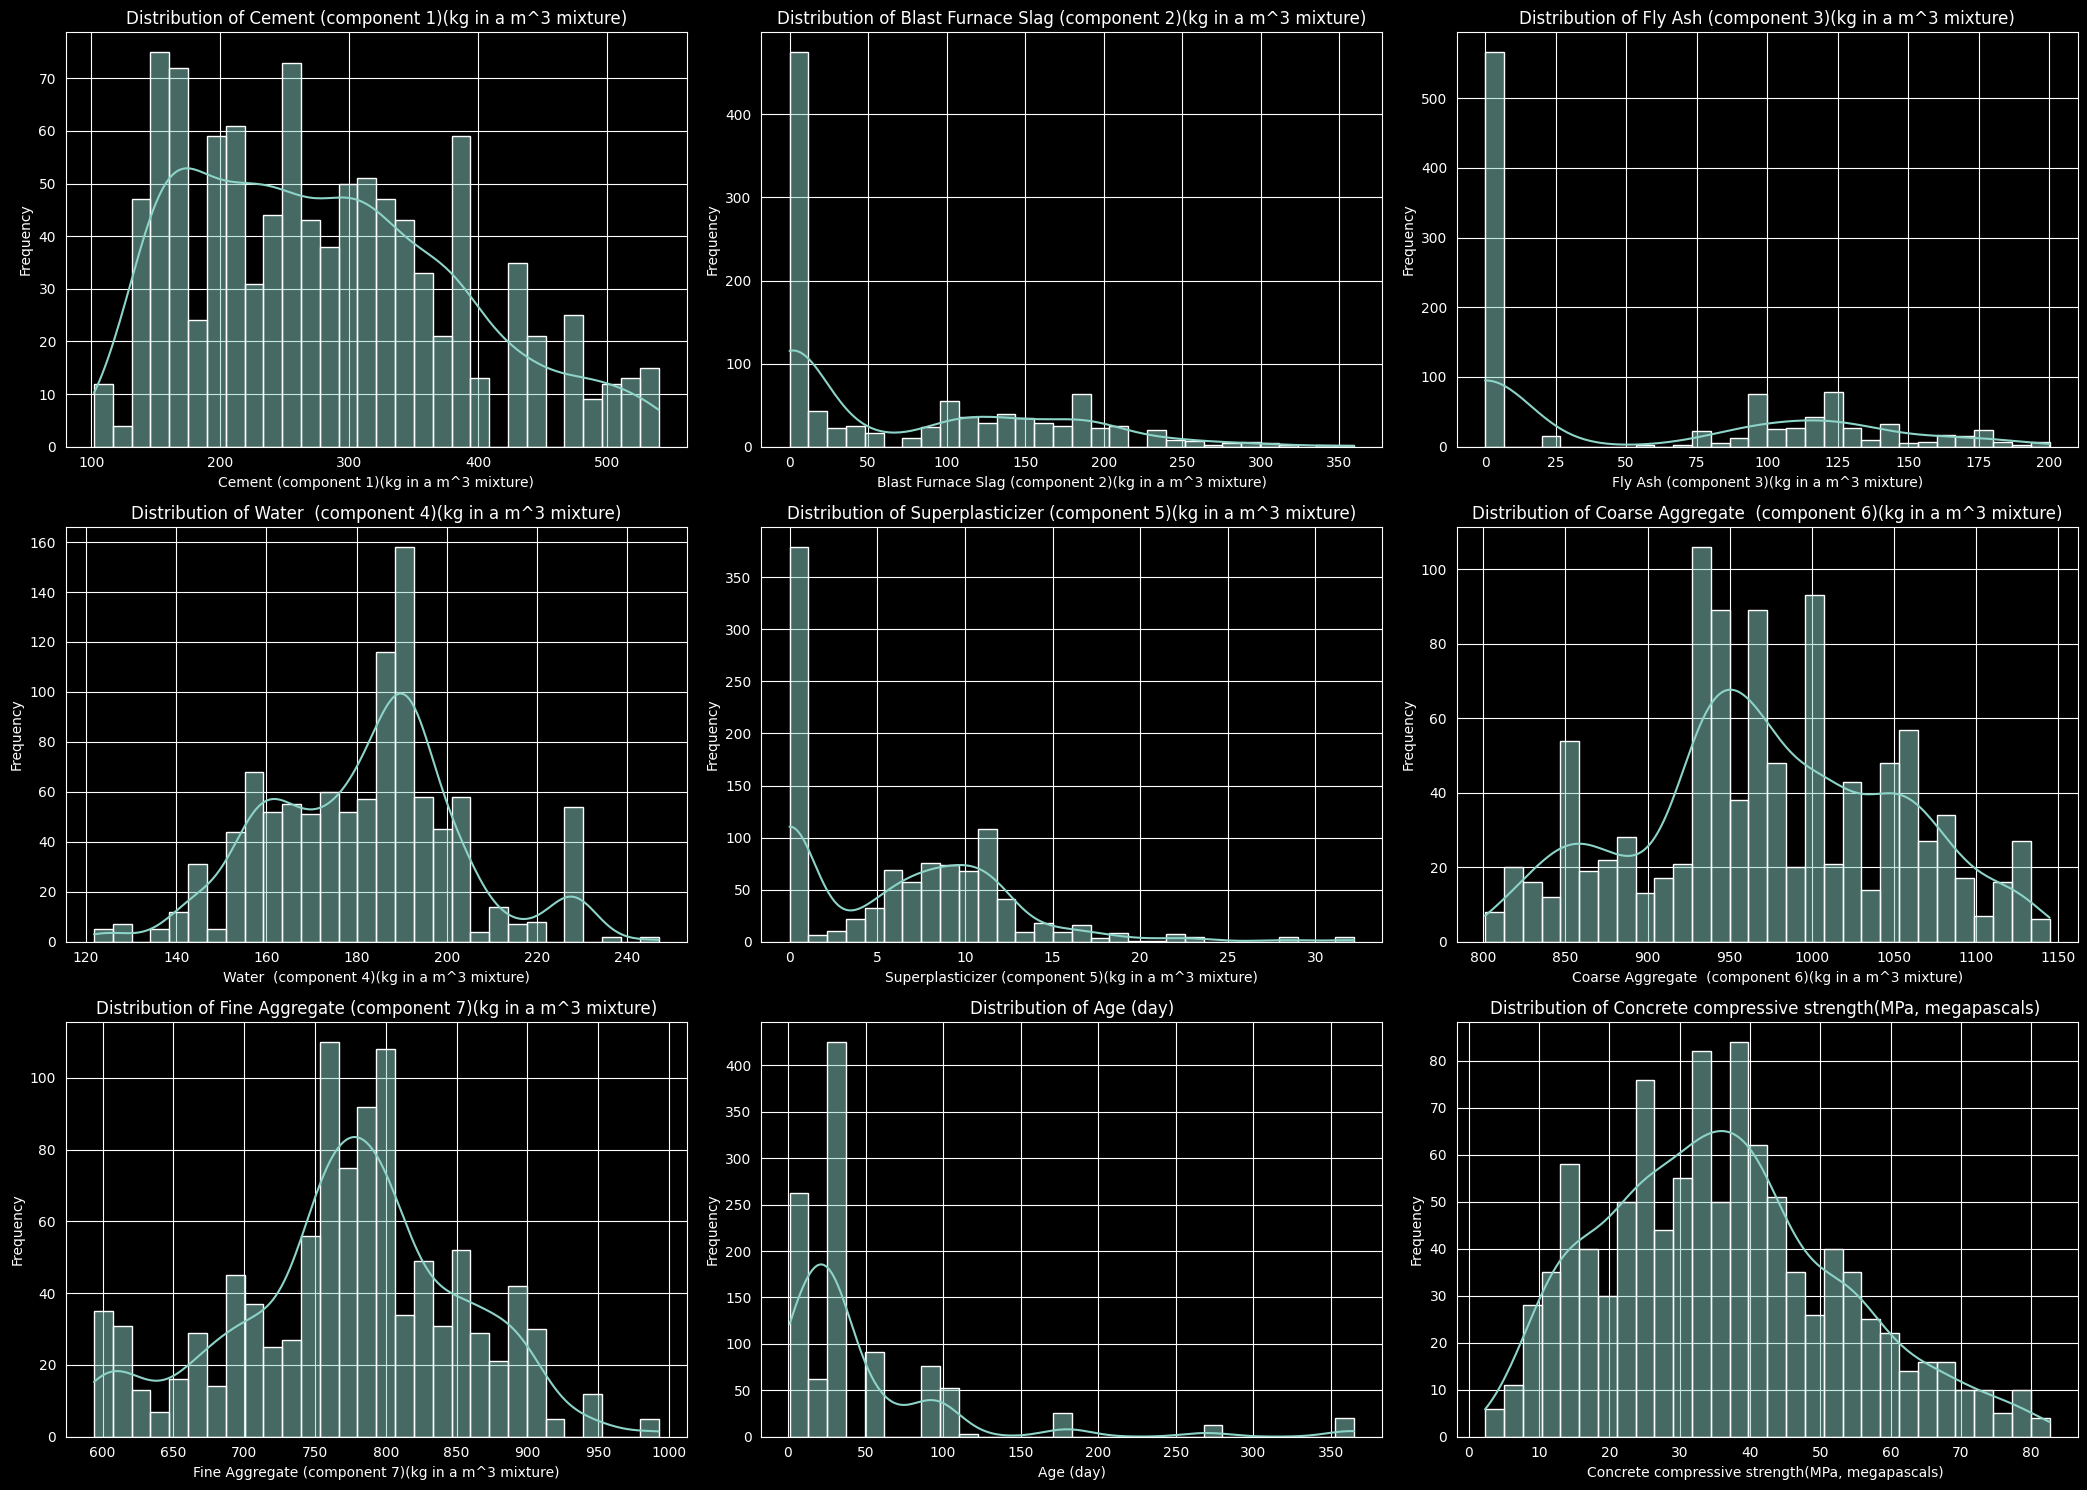

In [10]:
# Finding the distribution shape of each column to understand the data
def distribution_shape(df, cols_per_row = 3):
    #Only plot for numeric columns
    numeric_cols = df.select_dtypes(include = "number").columns
    n_columns = len(numeric_cols)
    n_rows = math.ceil (n_columns / cols_per_row)

    # Create sub-plots
    fig, axes = plt.subplots(n_rows,cols_per_row, figsize = (7*cols_per_row, 5*n_rows))
    axes = axes.flatten()   # Flatten to 1D for easy iteration.
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde = True, bins = 30, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Turn off any extra or empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

distribution_shape(df, cols_per_row = 3)

## Concrete Mix Dataset - Distribution Summary
Summary of the distribution of each variable in the concrete mix dataset.
### Feature Distributions

**Cement**: Slightly right skewed. Most mixes use **150–350 kg/m³**, with fewer high-cement mixes.

**Blast Furnace Slag**: Heavily right skewed. Most samples have **zero or very low slag**. It is an optional additive and many mixes do not use it.

**Fly Ash**: Heavily right skewed. Similar to slag, it is an optional additive and the majority of mixes have **zero fly ash**.

**Water**: Fairly normally distributed, centered around **180 kg/m³**. This is the most controlled ingredient in the mix design.

**Superplasticizer**: Heavily right skewed. Many mixes use **none at all**, with a smaller group using moderate amounts.

**Coarse Aggregate**: Roughly uniform or bimodal. Two popular quantity ranges are visible, suggesting **two common mix design families** in the dataset.

**Fine Aggregate**: Slightly right skewed, centered around **750–800 kg/m³**. Reasonably well distributed.

**Age**: Very heavily right skewed. Most samples were tested at **early ages (~28 days)**; very few at 90–365 days. **Log transformation** is recommended for modeling.

**Compressive Strength (Target)**: Right skewed, centered around **30–40 MPa**. Not perfectly normal; a **log transformation** may be considered for modeling.

### Key Takeaways

1. **Zero-heavy features**: Slag, Fly Ash, and Superplasticizer have many zeros, following a **zero-inflated distribution**.
2. **Log transformation needed**: Age and Compressive Strength both exhibit strong right skew and may benefit from log transformation before modeling.
3. **Controlled variables**: Water and Cement are generally well-behaved and mostly centered around typical ranges.
4. **Potential mix families**: Coarse Aggregate shows bimodal tendencies, indicating different mix design approaches.

This summary will guide preprocessing and feature engineering for predictive modeling of concrete strength.

### BIVARIATE ANALYSIS
Since Compressive strength our output is the main feature, we want to observe how other features relate to it.

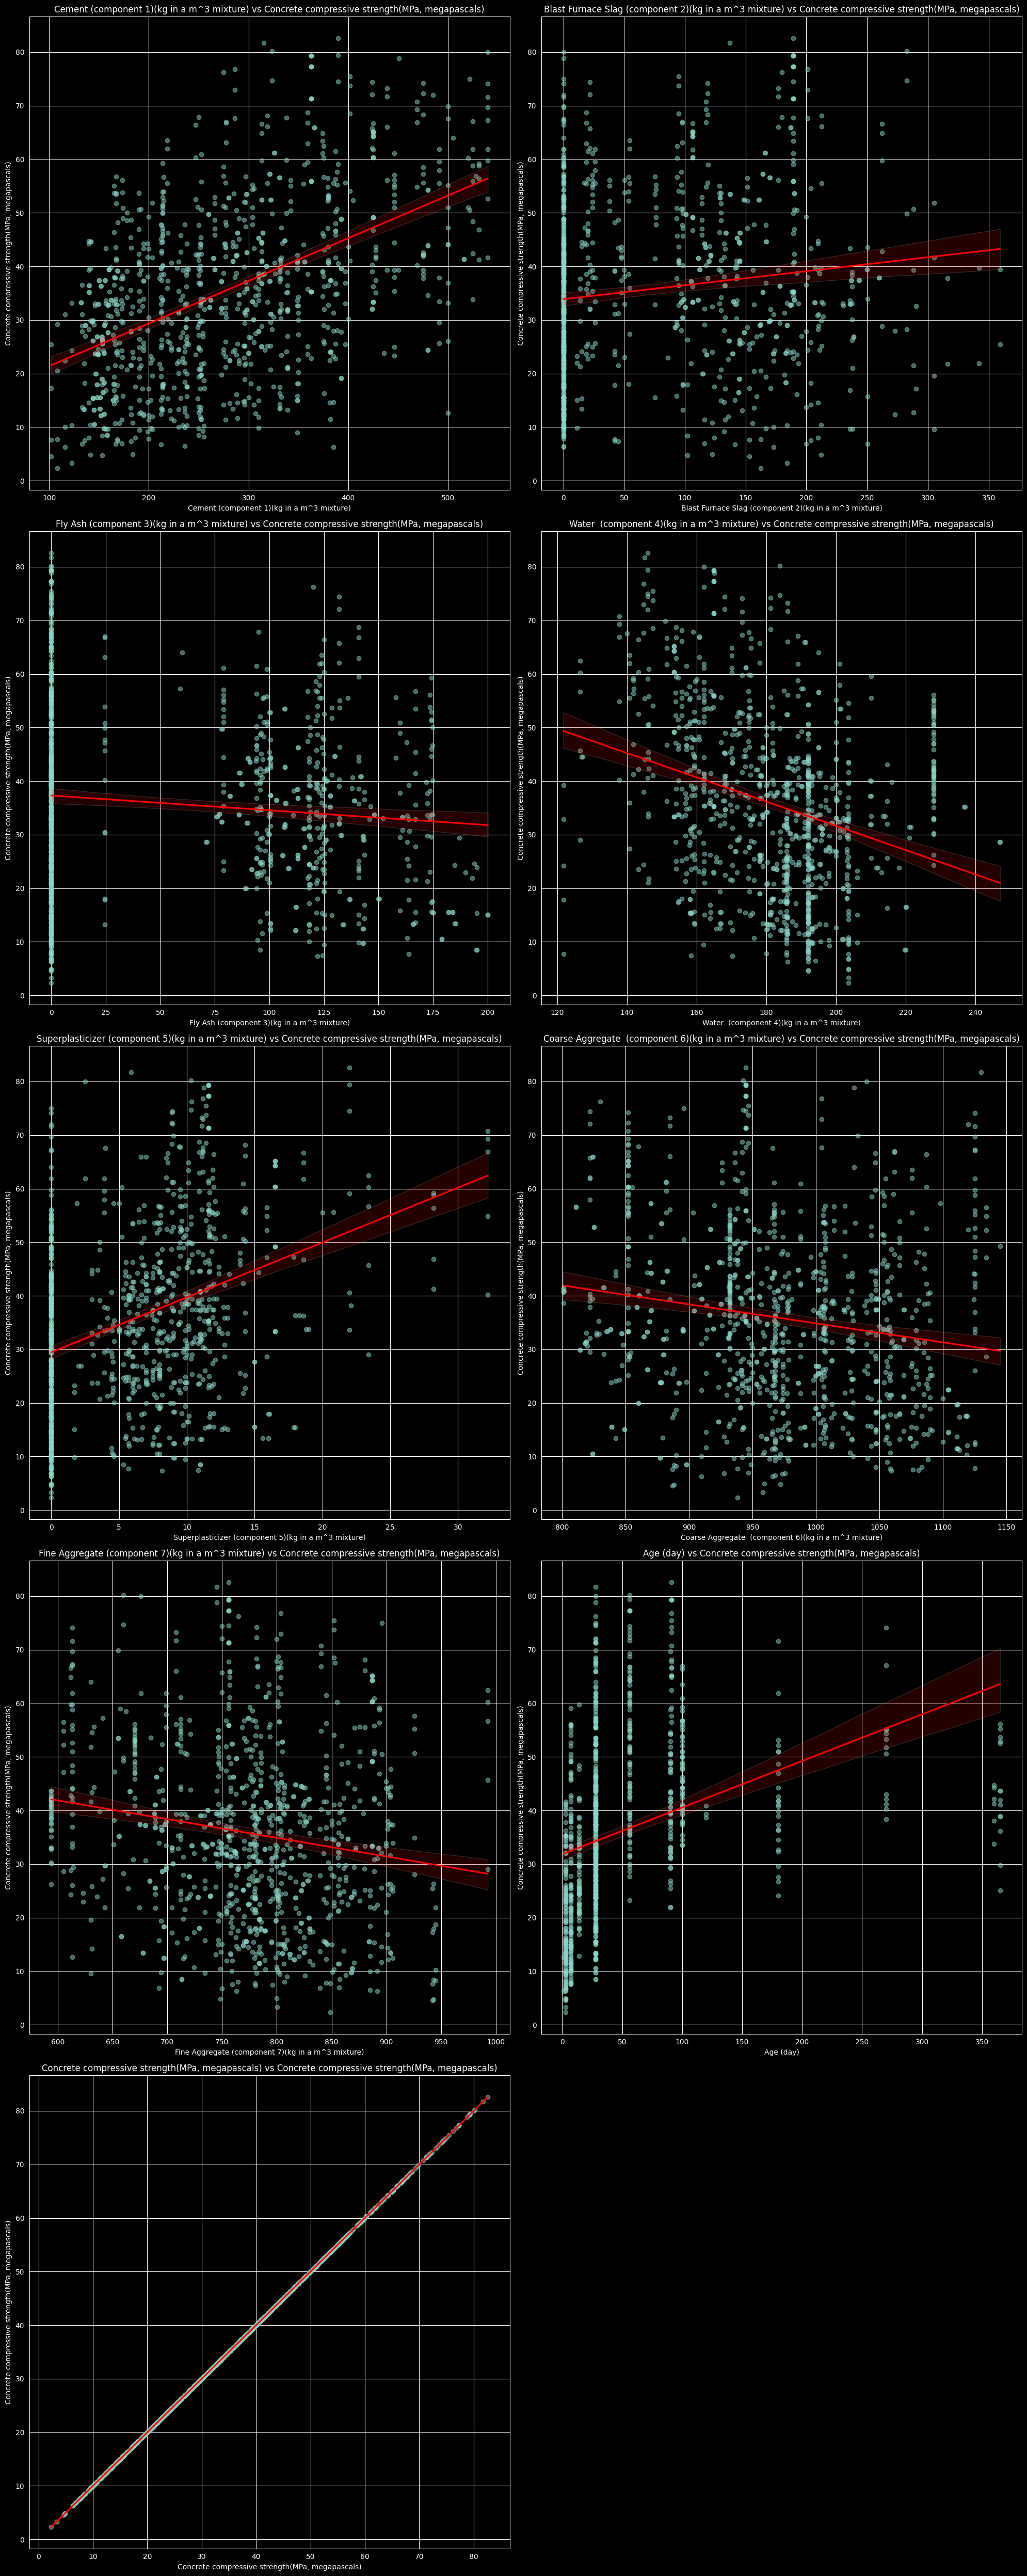

In [11]:
def plot_target_relationships(df, cols_per_row = 2):
    df.columns = df.columns.str.strip()
    target_col= "Concrete compressive strength(MPa, megapascals)"
    numeric_cols = df.select_dtypes(include = "number").columns
    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / cols_per_row)

    # Plotting the sub-plots
    fig, axes = plt.subplots(n_rows,cols_per_row, figsize = (10*cols_per_row, 10*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.regplot(x=df[col], y=df[target_col], ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        axes[i].set_title(f"{col} vs {target_col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)

    # Turn off any empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

plot_target_relationships(df, cols_per_row = 2)

# Bivariate Analysis of Concrete Compressive Strength Dataset

This analysis explores how each numeric feature relates to **Concrete Compressive Strength (MPa)** using scatter plots and regression lines.

---

## Feature Insights

### Cement vs Strength
- Relationship: Strong positive
- Insight: As cement increases, strength increases consistently. Trend is slightly non-linear, curving upward. Cement is one of the most important features in the model.

### Blast Furnace Slag vs Strength
- Relationship: Weak positive
- Insight: Many mixes have zero slag, forming a vertical cluster at 0. When used, slag contributes to strength, but the effect is noisy and depends on age and cement content.

### Fly Ash vs Strength
- Relationship: Flat to slightly negative
- Insight: Fly Ash is a slow-reacting material, so its effect appears only at later ages. Interaction with Age is important.

### Water vs Strength
- Relationship: Negative
- Insight: Higher water content lowers strength, confirming the water-to-cement ratio theory. Key feature in concrete engineering.

### Superplasticizer vs Strength
- Relationship: Positive but clustered
- Insight: Most samples use no superplasticizer, forming a vertical cluster at 0. Where used, the trend is positive. Consider creating a binary feature indicating usage.

### Coarse Aggregate vs Strength
- Relationship: Very weak / flat
- Insight: Strength is scattered across all values. Alone, this feature carries little predictive power.

### Fine Aggregate vs Strength
- Relationship: Very weak / slightly negative
- Insight: More about workability and void-filling than direct strength contribution.

### Age vs Strength
- Relationship: Strong positive, non-linear
- Insight: Older concrete is stronger. Most samples are clustered at early ages; strength rises steeply then flattens. Log transformation is recommended.

---

## Key Takeaways and Recommended Actions

| Feature             | Relationship          | Recommended Action                     |
|--------------------|--------------------|---------------------------------------|
| Cement             | Strong positive     | Keep as-is                             |
| Water              | Strong negative     | Maintain and engineer w/c ratio        |
| Age                | Non-linear positive | Apply log transformation               |
| Blast Furnace Slag | Weak positive       | Consider interaction with Age          |
| Fly Ash            | Flat / misleading   | Include Age interaction                |
| Superplasticizer   | Positive, clustered | Consider binary "used or not" flag    |
| Coarse Aggregate   | Very weak           | May drop or keep                       |
| Fine Aggregate     | Very weak           | May drop or keep                       |

---

## Summary
- Cement and water show the strongest relationships with compressive strength.
- Age is non-linear and will benefit from log transformation.
- Features like Fly Ash, Slag, and Superplasticizer are zero-heavy and may need interaction or transformation.
- Coarse and fine aggregates show weak direct correlation but may contribute indirectly in combination with other features.

## CORRELATION ANALYSIS
- The aim is to understand how different variable correlate to one another, that is how they relate.

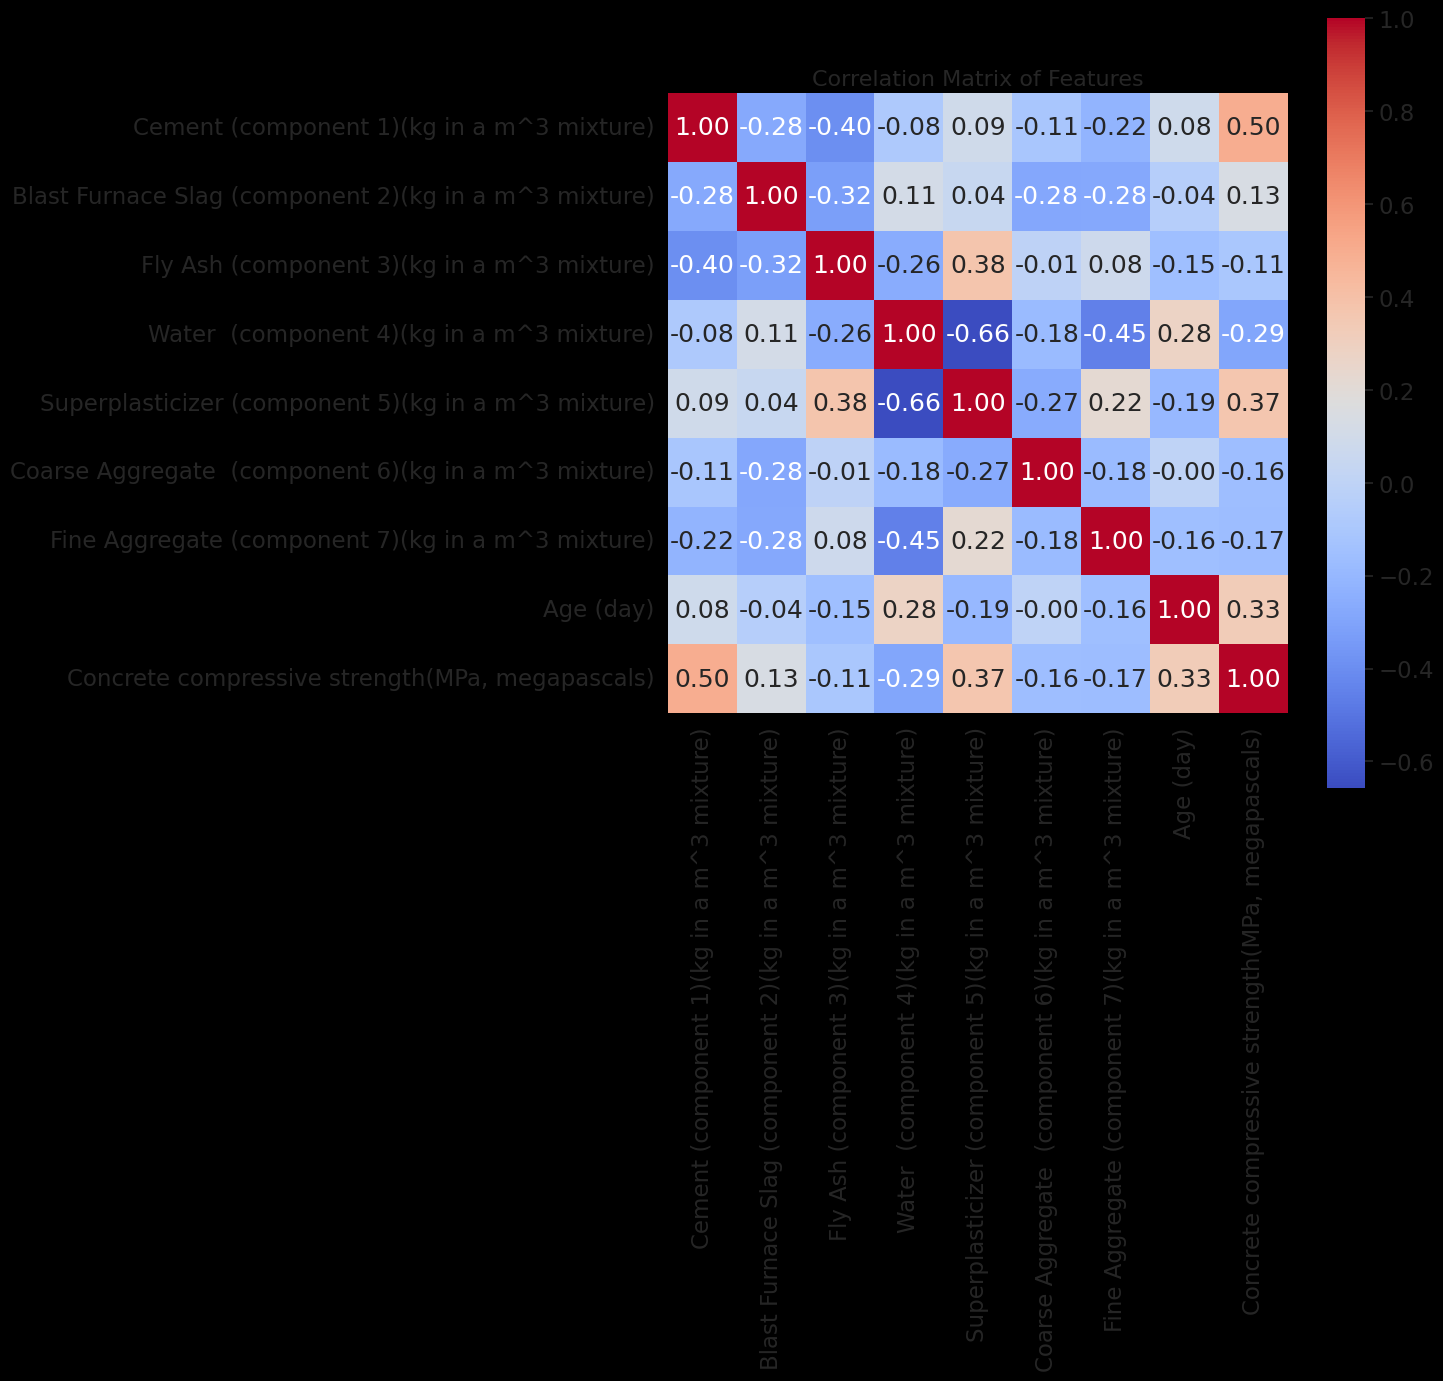

In [12]:
# Correlation matrix (Heatmap)
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar = True, square = True) #.2f formats the numbers to 2dp
plt.title("Correlation Matrix of Features", fontsize = 16)
plt.show()

## Correlation Analysis

This section explores the relationships between features and the target variable, **Concrete Compressive Strength (MPa)**, using a correlation matrix heatmap.

---

## Features vs Target (Compressive Strength)

The table below summarizes how strongly each feature correlates with compressive strength.

| Feature            | Correlation | Interpretation |
|--------------------|-------------|----------------|
| Cement             | +0.49       | Strongest predictor. Positive relationship as expected. |
| Age                | +0.34       | Second strongest. Older concrete is stronger. |
| Superplasticizer   | +0.34       | Positive. Helps reduce water requirement and improves strength. |
| Water              | -0.27       | Negative. Confirms water-cement ratio theory. |
| Fine Aggregate     | -0.19       | Weak negative relationship. |
| Coarse Aggregate   | -0.14       | Very weak negative relationship. |
| Blast Furnace Slag | +0.10       | Weak positive. Slow acting material. |
| Fly Ash            | -0.08       | Almost zero. Effect depends heavily on age. |

**Key Insight:** Cement, Age, and Superplasticizer are the top three raw predictors of compressive strength.

---

## Multicollinearity (Feature Interactions)

Understanding relationships between features is critical for model selection.

### Key Relationships

| Feature Pair | Correlation | Interpretation |
|--------------|-------------|----------------|
| Water ↔ Superplasticizer | -0.65 | Strong inverse relationship. Superplasticizer is used to reduce water content. |
| Fly Ash ↔ Superplasticizer | +0.41 | Modern mixes often use both together. |
| Cement ↔ Fly Ash | -0.39 | Fly Ash replaces part of cement in mix design. |
| Cement ↔ Slag | -0.30 | Slag also substitutes cement partially. |
| Fine Aggregate ↔ Water | -0.44 | Higher fine aggregate mixes tend to use less water. |

---

## What This Means for the Project

### Feature Engineering

The substitution patterns between Cement, Slag, and Fly Ash strongly support creating engineered features:

- **Total Binder = Cement + Slag + Fly Ash**
- **Water-Cement Ratio (w/c)**

These engineered features are expected to improve model performance.

### Model Selection

The strong multicollinearity between Water and Superplasticizer (-0.65) suggests that:

- Linear Regression may be unstable or unreliable.
- Tree-based models such as Random Forest and XGBoost are more appropriate because they handle correlated features naturally.

### Feature Importance Considerations

Coarse Aggregate and Fine Aggregate show weak correlations with strength. They may not be strong predictors individually but still contribute to the overall mix balance.

---

## Summary

Cement is the strongest predictor of compressive strength, followed by Age and Superplasticizer. Water negatively impacts strength, confirming established engineering theory. Slag and Fly Ash act as cement replacement materials, explaining their negative correlation with cement. Aggregates contribute less individually. Due to multicollinearity between several features, especially Water and Superplasticizer, non-linear tree-based models are likely the most suitable approach for this problem.

## ENGINEERING DRIVEN ANALYSIS

count    1030.000000
mean        0.748269
std         0.314005
min         0.266893
25%         0.533333
50%         0.675349
75%         0.935014
max         1.882353
Name: w_c_ratio, dtype: float64


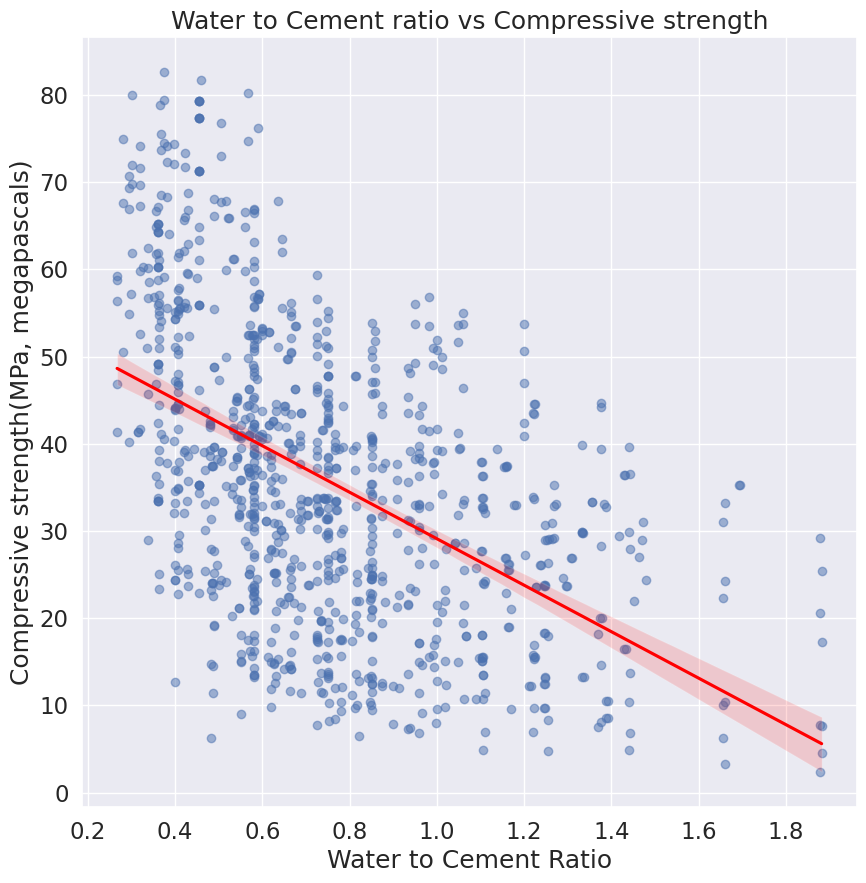

,Water (component 4)(kg in a m^3 mixture),Cement (component 1)(kg in a m^3 mixture),w_c_ratio,"Concrete compressive strength(MPa, megapascals)"
Water (component 4)(kg in a m^3 mixture),1.000000,-0.081544,0.332962,-0.289613
Cement (component 1)(kg in a m^3 mixture),-0.081544,1.000000,-0.879121,0.497833
w_c_ratio,0.332962,-0.879121,1.000000,-0.500700
"Concrete compressive strength(MPa, megapascals)",-0.289613,0.497833,-0.500700,1.000000


In [13]:
# 1. Water to Cement Ratio Analysis
# Create the w/c ratio feature
df.columns = df.columns.str.strip()
df["w_c_ratio"] = df["Water  (component 4)(kg in a m^3 mixture)"] / df["Cement (component 1)(kg in a m^3 mixture)"]
# Check the ratios
print(df["w_c_ratio"].describe())
# Plot against Compressive strength
plt.figure(figsize = (10,10))
sns.regplot(
    x = df["w_c_ratio"],
    y = df["Concrete compressive strength(MPa, megapascals)"],
    scatter_kws = {'alpha':0.5},
    line_kws = {'color':'red'},
)

plt.title("Water to Cement ratio vs Compressive strength")
plt.xlabel("Water to Cement Ratio")
plt.ylabel("Compressive strength(MPa, megapascals)")
plt.show()

# Compare correlations
df[["Water  (component 4)(kg in a m^3 mixture)","Cement (component 1)(kg in a m^3 mixture)", "w_c_ratio","Concrete compressive strength(MPa, megapascals)"]].corr()

## Water to Cement Ratio Analysis

### What the Scatter Plot Shows

The relationship between the water to cement ratio and compressive strength follows classical concrete engineering theory. As the water to cement ratio increases, compressive strength decreases consistently. The trend is strong and clear, aligning with Abrams' Law, the foundational principle of concrete mix design established in 1919.

The visible scatter around the trend line is expected and can be explained by other influencing variables such as curing age, slag content, and fly ash content. No single variable explains strength completely, but the water to cement ratio explains a large portion of the variation.

---

### What the Correlation Table Confirms

The correlation analysis provides several important insights.

- Water to cement ratio vs Strength: -0.489
  This engineered feature shows a stronger relationship with strength than water alone (-0.27) and is comparable to cement alone (+0.49). By combining two raw features into a ratio, we created a more informative predictor than either individual variable. This demonstrates the value of domain driven feature engineering.

- Water to cement ratio vs Cement: -0.876
  This very strong negative correlation is expected because increasing cement lowers the ratio. However, it also indicates potential multicollinearity if both cement and the ratio are used together in linear models. Tree based models are less sensitive to this issue.

- Water to cement ratio vs Water: +0.315
  A moderate positive relationship is expected since water is the numerator in the ratio calculation.

---

### Key Engineering Insight

The water to cement ratio is more than just another feature. It is a physics based summary of the interaction between the two most critical ingredients in concrete. By capturing this interaction in a single value, the ratio becomes more predictive than either component individually. This illustrates how incorporating domain knowledge can significantly improve machine learning performance.

---

### Decision for Feature Engineering

The water to cement ratio will be retained as a new engineered feature.

A decision will be required later regarding whether to:

- Keep cement, water, and the ratio together for tree based models, or
- Remove redundant variables to reduce multicollinearity for linear models

This decision will be addressed during the modeling stage.

count    1030.000000
mean      409.248252
std        92.783290
min       200.000000
25%       336.380000
50%       391.350000
75%       483.700000
max       640.000000
Name: total_binder_content, dtype: float64


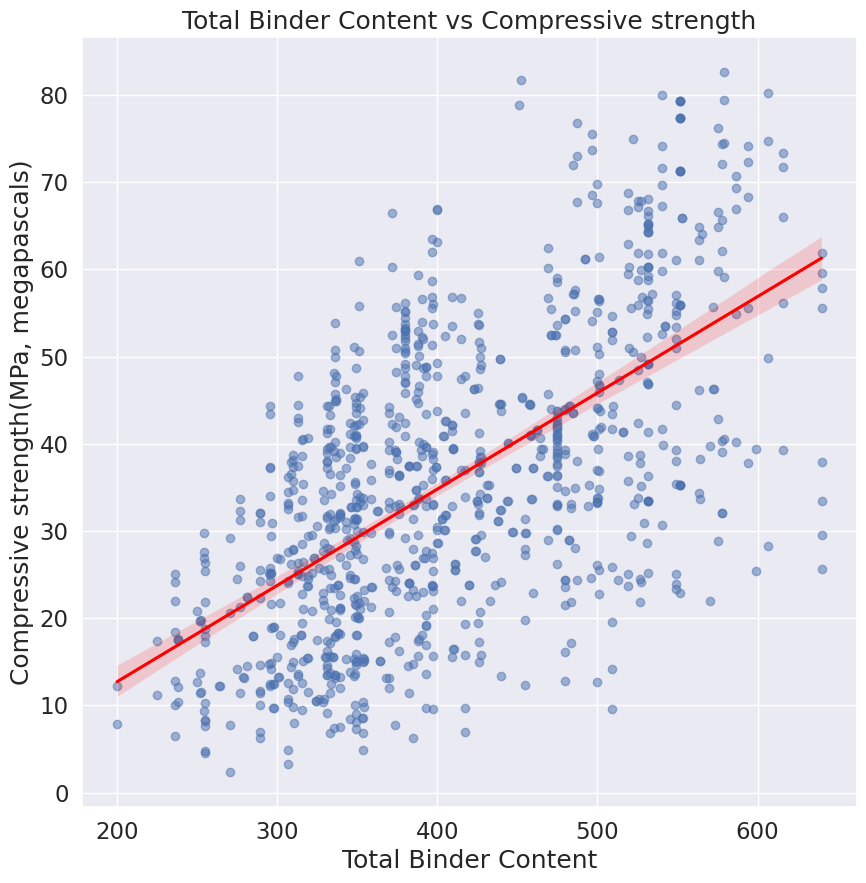

,total_binder_content,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
total_binder_content,1.000000,0.596300,0.396754,-0.058845,0.613168
Cement (component 1)(kg in a m^3 mixture),0.596300,1.000000,-0.275193,-0.397475,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.396754,-0.275193,1.000000,-0.323569,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.058845,-0.397475,-0.323569,1.000000,-0.105753
"Concrete compressive strength(MPa, megapascals)",0.613168,0.497833,0.134824,-0.105753,1.000000


In [14]:
# 2. Total Binder Content
# Cement, Slag and Fly ash all contribute to the binding strength
df.columns.str.strip()
df["total_binder_content"] = df["Cement (component 1)(kg in a m^3 mixture)"] + df["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"] + df["Fly Ash (component 3)(kg in a m^3 mixture)"]
#Data Integrity
print(df["total_binder_content"].describe())
# Plotting it against strength
plt.figure(figsize = (10,10))
sns.regplot(
    x = df["total_binder_content"],
    y = df["Concrete compressive strength(MPa, megapascals)"],
    scatter_kws = {'alpha':0.5},
    line_kws = {'color':'red'},
)
plt.title("Total Binder Content vs Compressive strength")
plt.xlabel("Total Binder Content")
plt.ylabel("Compressive strength(MPa, megapascals)")
plt.show()
# Correlation matrix
df[["total_binder_content","Cement (component 1)(kg in a m^3 mixture)", "Blast Furnace Slag (component 2)(kg in a m^3 mixture)","Fly Ash (component 3)(kg in a m^3 mixture)","Concrete compressive strength(MPa, megapascals)"]].corr()


## Total Binder Content Analysis

### What the Scatter Plot Shows

Total Binder Content (Cement + Slag + Fly Ash) versus Compressive Strength shows a strong and clean positive trend that is noticeably clearer than any of the three individual ingredients alone. The relationship appears nearly linear across the full range from approximately 200 to 650 kg/m³. This confirms that combining the three binder materials into a single feature captures their collective contribution far better than treating them separately.

The scatter widens slightly at higher binder content levels. This makes engineering sense because at high binder quantities other factors such as the water to cement ratio and curing age begin to dominate the variation in strength.

---

### What the Correlation Analysis Confirms

**Total Binder vs Strength: +0.598**
This is the strongest correlation observed so far with the target variable. It is higher than Cement alone at +0.49 and higher than the water to cement ratio at -0.489. This single engineered feature outperforms all raw features individually, representing a significant improvement.

**Total Binder vs Cement: +0.584**
This is expected because cement is the dominant component of total binder in most mixes.

**Total Binder vs Slag: +0.377**
Moderate positive relationship indicating slag contributes meaningfully to total binder content.

**Total Binder vs Fly Ash: -0.032**
Nearly zero correlation. Fly ash usage is inconsistent across mixes, with many observations containing zero fly ash.

**Fly Ash vs Strength: -0.088**
This confirms earlier findings. When analyzed alone, fly ash appears to have little or slightly negative influence on strength, which is misleading without considering curing age.

---

### Key Engineering Insight

The reason Total Binder outperforms individual components is rooted in concrete mix design theory. Strength depends on the total amount of cementitious material available for hydration reactions, regardless of which specific supplementary cementitious material contributes to it. By summing the components, the feature directly encodes this physical reality into the dataset.

The weak contribution of fly ash to the total binder correlation also highlights an important modeling consideration. Fly ash behaves differently from cement and slag because it reacts more slowly. This suggests that fly ash may require an interaction feature with age rather than being treated only as part of the combined binder.



count    1030.000000
mean        4.534873
std         1.240334
min         2.376562
25%         3.434167
50%         4.470781
75%         5.390902
max         9.850000
Name: aggregate_to_binder_ratio, dtype: float64


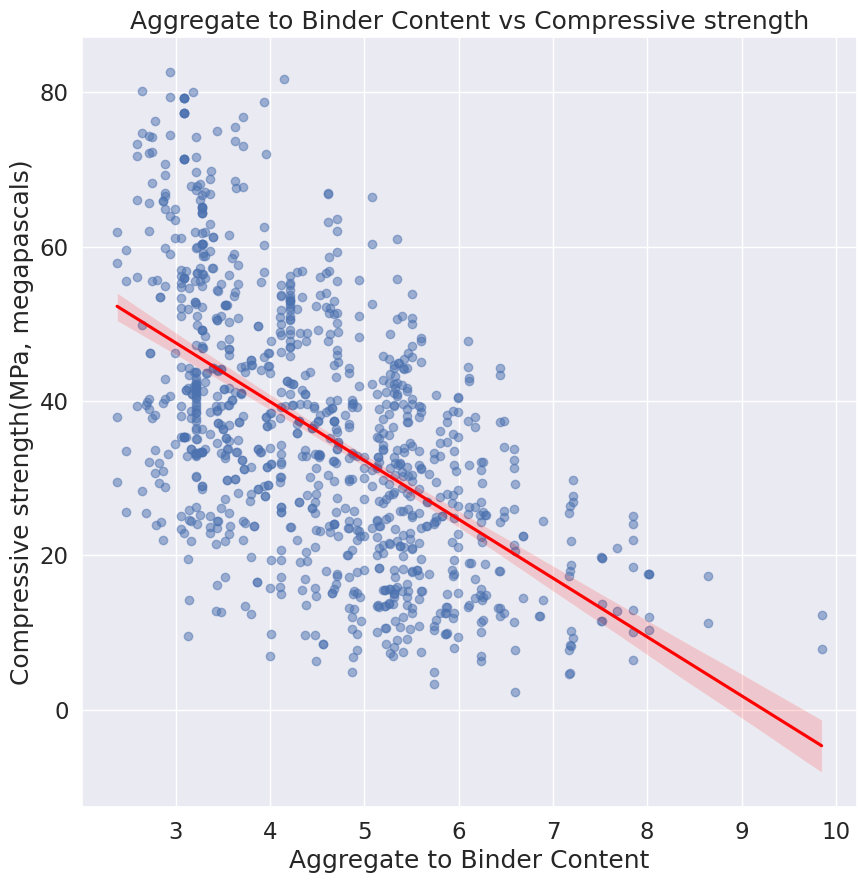

In [15]:
# 3. Aggregate to Binder Ratio
# Concrete is basically paste made up of (binder + water) plus aggregates (sand + gravel)
# They should always be in the right ratio.
df.columns.str.strip()
df["total_aggregate_quantity"] = df["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"] + df["Fine Aggregate (component 7)(kg in a m^3 mixture)"]
# Ratio feature
df["aggregate_to_binder_ratio"] = df["total_aggregate_quantity"] / df["total_binder_content"]
print(df["aggregate_to_binder_ratio"].describe())

# Plotting against CS
plt.figure(figsize = (10,10))
sns.regplot(
    x = df["aggregate_to_binder_ratio"],
    y = df["Concrete compressive strength(MPa, megapascals)"],
    scatter_kws = {'alpha':0.5},
    line_kws = {'color':'red'},
)
plt.title("Aggregate to Binder Content vs Compressive strength")
plt.xlabel("Aggregate to Binder Content")
plt.ylabel("Compressive strength(MPa, megapascals)")
plt.show()


## Aggregate-to-Binder Ratio Analysis

### What the Scatter Plot Shows

The Aggregate-to-Binder ratio, defined as (Coarse Aggregate + Fine Aggregate) divided by Total Binder, versus Compressive Strength shows a strong negative trend. As the ratio increases, strength drops consistently and steeply. The regression line is well-fitted and the confidence band is tight, particularly at lower ratio values.

This result is notable because individually, Coarse Aggregate and Fine Aggregate showed almost no correlation with strength. When expressed relative to the binder content, a clear and powerful relationship emerges. This is an excellent example of domain knowledge guiding feature engineering.

---

### Key Engineering Insight

Physically, a high aggregate-to-binder ratio indicates that there is relatively less cementitious paste available to coat and bind the aggregate particles. The paste is what gives concrete its strength. Too much aggregate with insufficient paste results in weak, poorly bonded concrete.

This ratio captures the critical balance between paste and aggregate. A mix containing 900 kg/m³ of aggregate may be strong or weak depending entirely on the binder amount. By using the ratio, we encode this balance directly into a feature that is far more informative than the absolute aggregate quantities alone.

---

### Contribution to Feature Set

This is now the third engineered feature derived from domain knowledge. The three features together form the backbone of our predictive model:

| Engineered Feature      | Correlation with Strength | Source / Computation                     |
|-------------------------|--------------------------|-----------------------------------------|
| w/c ratio               | -0.489                   | Water ÷ Cement                           |
| Total Binder Content    | +0.598                   | Cement + Slag + Fly Ash                  |
| Aggregate-to-Binder ratio | Strong negative         | (Coarse Aggregate + Fine Aggregate) ÷ Total Binder |

None of these features existed in the raw dataset. Each was created from engineering principles and all three outperform most of the raw features as predictors.

---

### Considerations for Modeling

The regression line slightly extrapolates to negative strength values at very high ratios (around 9–10), which is physically impossible. This indicates the relationship is not perfectly linear at the extremes and there are very few samples in this range. Tree-based models will handle this naturally, but linear models may require caution or transformation.

age_group
Standard (8-28)    487
Early (1-7)        262
Mature (29-90)     145
Long-term (90+)    136
Name: count, dtype: int64
1030


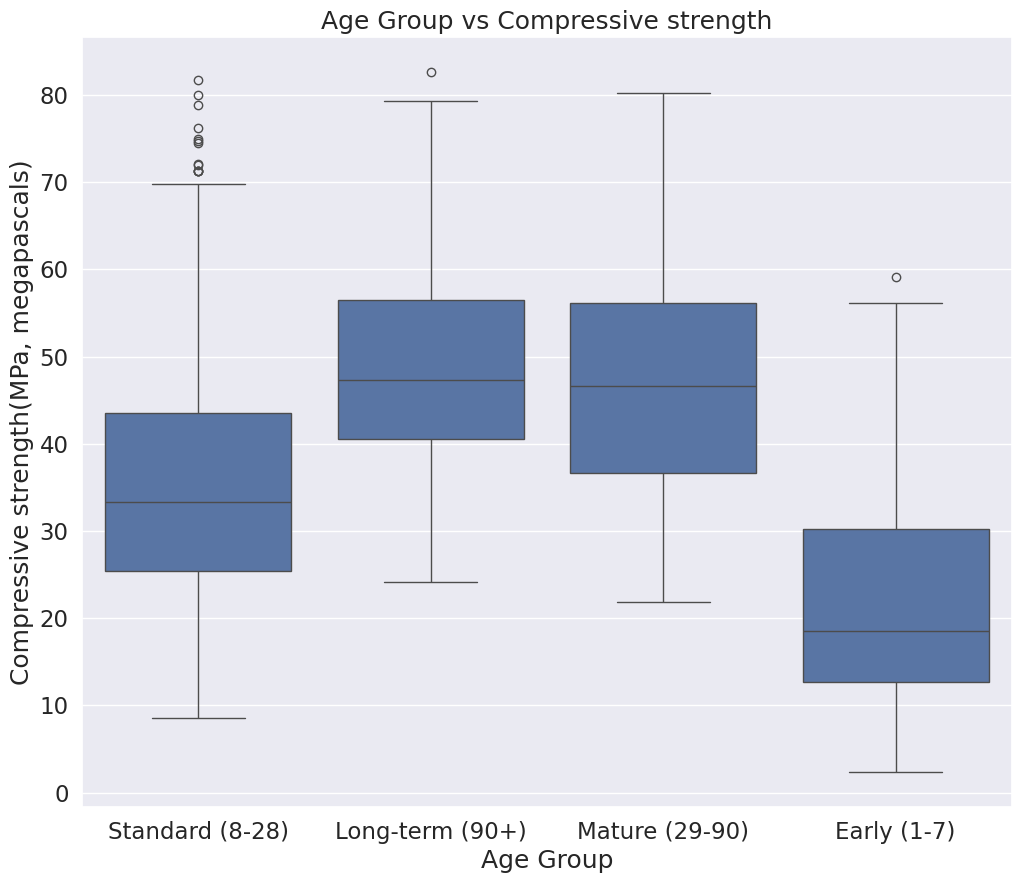

age_group
Early (1-7)        22.308202
Long-term (90+)    49.551428
Mature (29-90)     47.641098
Standard (8-28)    35.730325
Name: Concrete compressive strength(MPa, megapascals), dtype: float64


In [16]:
# 4. Strength by Age Groups
df.columns.str.strip()
# Create different age groups
def age_groups(age):
    df.columns.str.strip()
    if age <= 7:
        return "Early (1-7)"
    elif age <= 28:
        return "Standard (8-28)"
    elif age <= 90:
        return "Mature (29-90)"
    else:
        return "Long-term (90+)"

df["age_group"] = df["Age (day)"].apply(age_groups)
print(df["age_group"].value_counts())
print(df["age_group"].value_counts().sum())

# Compare strengths between groups
plt.figure(figsize = (12,10))
sns.boxplot(
    x = df["age_group"],
    y = df["Concrete compressive strength(MPa, megapascals)"],
    data = df,
)
plt.title("Age Group vs Compressive strength")
plt.xlabel("Age Group")
plt.ylabel("Compressive strength(MPa, megapascals)")
plt.show()

# Group summary
group_summary = df.groupby("age_group")["Concrete compressive strength(MPa, megapascals)"].mean()
print(group_summary)


## Age Group Analysis

### What the Box Plot Shows

Grouping concrete samples by Age tells a physically meaningful story from weakest to strongest:

- **Early (1–7 days)**: median ~17.5 MPa — the weakest group. Concrete is still in early hydration. The box is small and tight at the bottom, indicating most early-age concrete is consistently weak. Outliers reaching 50–58 MPa are likely high-cement, low w/c mixes gaining strength unusually fast.

- **Standard (8–28 days)**: median ~33 MPa — the most common testing age in practice, with 28 days being the industry standard. The box is wide, showing high variability due to diverse mix designs. Outliers above 70 MPa represent exceptional high-performance mixes.

- **Mature (29–90 days)**: median ~45 MPa — strength has jumped significantly. Concrete continues gaining strength past 28 days, especially mixes containing SCMs like Slag.

- **Long-term (90+ days)**: median ~48.6 MPa — the strongest group. The median is similar to Mature, but the box extends higher, reflecting slow-reacting mixes dominated by Slag or Fly Ash that continue gaining strength beyond 90 days.

---

### Mean Strength by Age Group

| Age Group      | Mean Strength (MPa) |
|----------------|-------------------|
| Early (1–7)    | 21.6              |
| Standard (8–28)| 35.4              |
| Mature (29–90) | 46.8              |
| Long-term (90+)| 48.6              |

Observations:

- Early → Standard: +13.8 MPa (largest jump, rapid early hydration)
- Standard → Mature: +11.4 MPa (still significant)
- Mature → Long-term: +1.8 MPa (plateau, typical hydration behavior)

---

### Key Engineering Insights

- Most strength gain occurs in the first 90 days. Beyond that, gains are marginal for ordinary Portland cement mixes.
- The wide spread in the Long-term group indicates that some SCM-heavy mixes continue gaining strength, confirming the Fly Ash × Age and Slag × Age interactions identified earlier.
- High variability in the Standard group highlights that at 28 days, mix design choices (w/c ratio, binder content) have the largest influence on strength. This is the age range where the model must be most accurate.

---

### Decisions for Feature Engineering

- Age should not be treated as a raw linear feature.
- Two age-related features will be created:
  1. **Log-transformed Age** to compress non-linear behavior.
  2. **Categorical Age Group** (Early / Standard / Mature / Long-term) as an additional feature.
- Interaction terms **Fly Ash × Age** and **Slag × Age** will be created to capture slow-reacting SCM effects.

In [17]:
# Saving the new data dataset with additional columns
dir_path = os.path.join(os.path.dirname(os.getcwd()), "data", "processed")
# Create the directory if it does not exist
os.makedirs(dir_path, exist_ok = True)
file_path = os.path.join(dir_path, "concrete_pre-processed.xlsx")
df.to_excel(file_path, index = False)
print(f"Processed data saved to {file_path}")


Processed data saved to /home/local-host/PycharmProjects/concrete_strength_prediction/data/processed/concrete_pre-processed.xlsx
